# Data Cleaning and Exploration

## 1.) Problem Definition

> 
* Given historical maintenance and repair transactions of car owners, can we predict the car component that is most likely to fail?
* Can we predict how many days is the useful life of the component before failure (optional)



## 2.) Data

## 3.) Features

**Create Data Dictionary**

1. Created	
2. Mileage In
3. Mileage Out	
4. Work Order 
5. Year: ***model year** is a method of describing the version of a product which has been produced over multiple years. A vehicle's model year is not necessarily the same as the year it was manufactured.*
6. Make: *the **brand** of the vehicle*
7. Model: *refers to the name of a car product and sometimes a range of products*
8. Submodel: *refers to the specific body type style options of a vehicle *
   * *For example, the 2018 Honda Civic Sedan have six different trim-level options:
     * LX*
     * ET
     * EX-T
     * EX-L
     * Si
     * Touring
9. Engine: *a number or code refering to the identification marked on the engine of a vehicle.*
10. VIN (Vehicle Identification Number): *is the identifying code for a specific automobile. The VIN serves as the car's fingerprint, as no two vehicles in operation have the same VIN.* 
   * We can visit the Vin Decoders [[1](https://vpic.nhtsa.dot.gov/decoder/)], [[2](https://driving-tests.org/vin-decoder/)]
11. Line Type: general category for the services.
   * Material
   * Labor
   * Sublet (*What is a sublet?*)
12. Service Category
   * Oil, Lube & Preventive Maintenance Service
   * Sublet & Towing
   * Engine
   * Electrical (Belts, Lighting, Starting & Charging Systems)
   * Tires & Wheels
   * Driveability (Fuel, Ignition & Emission Systems)
   * Steering & Suspension 
   * Brakes
   * Cooling System
   * Transmission & Clutch
   * Car Detailing Services
   * Accessories (Gauges, Power Accessories, Vision & Air Bag)
   * Counter / Cash Sale
   * HVAC (Heating, Ventilation & Air Conditioning)
   * Drive Train (Final Drive, Transaxle, Differential & Transfer Case
   * Batteries
   * Exhaust
   * Shop Internal Warranty
13. Code: (*Is this a unique identifier code in their system?*)
14. Service Package: *Type of service package offered. How was this data gathered? Manually inputted? Or system defined?* (*There are 4251 unique values that they want to predict. How should we proceed?*)
15. Line Code
    * E.ROD
    * BAN
    * MIT 
    * FIC
    * FLE
    * BEN
    * SAI
    * 555
    * AISIN
16. Part Number: *Refers to the specific part serviced*(*There are 5396 unique values for Part Number. How should we proceed?*)
17. Description: **For Clarification** : *Does this column indicate the name of material/product used?*
18. Manufacturer: *Refers to the manufacturer of the product used during the service.*
19. Definition: **For Clarification:** *We have 24780 null values here, can we use the description instead? But this is also a good column since it generalizes the type of product used.*
20. Price
21. Quantity
22. Total
23. Discount
24. Net Total
25. Cost
26. Other Charge Code
27. ContactID
28. ServiceItemID
29. InvoiceID
30. DefinitionID




## Import Core Libraries


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
%matplotlib inline

pd.set_option('display.max_columns',50)

In [3]:
df_original = pd.read_csv("Dataset/Latest Autoserved Dataset (Compiled but not cleaned).csv", low_memory= False).drop('Unnamed: 0',axis = 1)
df_original.head()

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,Unit,Color,Line Type,Profit Center,Service Category,Code,Service Package,Part Number,Description,Manufacturer,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID
0,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,NaN,NaN,Material,Automotive Service,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,HON-15400-RAF-TO1,OIL FILTER HONDA,HONDA,Engine Oil Filter,696.43,1.0,696.43,0.0,696.43,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,5340.0
1,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,NaN,NaN,Material,Automotive Service,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,LUBRI-ENG-FLUSH-500,ENGINE FLUSHING,LUBRIGOLD,NaN,142.86,1.0,142.86,0.0,142.86,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
2,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,NaN,NaN,Material,Automotive Service,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,JOH-2413-14oz,BRAKE CLEANER 14oz,JOHNSENS,NaN,227.68,1.0,227.68,0.0,227.68,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
3,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,NaN,NaN,Labor,Automotive Service,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,NaN,Labor,NaN,NaN,446.43,3.0,1339.29,0.0,1339.29,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,NaN
4,2018-12-28 10:18:10,33320,33321,49,2012.0,Honda,Civic,NaN,NaN,JHMFB2650CS201966,NaN,NaN,Material,Automotive Service,"Oil, Lube & Preventive Maintenance Service",PMS / 30PMI,MINOR Preventive Maintenance Service (MEDIUM S...,RP139X51,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,REPSOL,Engine Oil,294.64,4.0,1178.56,0.0,1178.56,a271834a-1afc-4e62-8c71-638025174c1f,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,12138.0


In [4]:
# There are 5416 unique transactions
df_original['Work Order'].nunique()

5416

In [5]:
df_original['InvoiceID'].nunique()

7788

## General Data

In [6]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43020 entries, 0 to 43019
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Created           43020 non-null  object 
 1   Mileage In        43020 non-null  int64  
 2   Mileage Out       43020 non-null  int64  
 3   Work Order        43020 non-null  int64  
 4   Year              41182 non-null  float64
 5   Make              41115 non-null  object 
 6   Model             41028 non-null  object 
 7   Submodel          4504 non-null   object 
 8   Engine            25186 non-null  object 
 9   VIN               36603 non-null  object 
 10  Unit              125 non-null    object 
 11  Color             18146 non-null  object 
 12  Line Type         43020 non-null  object 
 13  Profit Center     43020 non-null  object 
 14  Service Category  43020 non-null  object 
 15  Code              26211 non-null  object 
 16  Service Package   43020 non-null  object

## Cleaned Dataset

In [7]:
df = pd.read_csv("Dataset\master_clean_car_make_latest.csv").drop(['Unnamed: 0','Unnamed: 0.1'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41028 entries, 0 to 41027
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Created           41028 non-null  object 
 1   Year              41028 non-null  int64  
 2   Work Order        41028 non-null  int64  
 3   Mileage In        41028 non-null  int64  
 4   Make              41028 non-null  object 
 5   Model             41028 non-null  object 
 6   Service Category  41028 non-null  object 
 7   Service Package   41028 non-null  object 
 8   Description       41028 non-null  object 
 9   Net Total         41028 non-null  float64
 10  ServiceItemID     41028 non-null  object 
 11  ContactID         41028 non-null  object 
 12  InvoiceID         41028 non-null  object 
 13  Line Type         41028 non-null  object 
dtypes: float64(1), int64(3), object(10)
memory usage: 4.4+ MB


In [9]:
# We use errors = `coerce` to force an out-of-bounds date to NaT
df['Created'] = pd.to_datetime(df['Created'],errors = 'coerce')

In [10]:
# Let us drop the NaT values for the column created
df = df.dropna()

In [11]:
# The new values for our dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41028 entries, 0 to 41027
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Created           41028 non-null  datetime64[ns]
 1   Year              41028 non-null  int64         
 2   Work Order        41028 non-null  int64         
 3   Mileage In        41028 non-null  int64         
 4   Make              41028 non-null  object        
 5   Model             41028 non-null  object        
 6   Service Category  41028 non-null  object        
 7   Service Package   41028 non-null  object        
 8   Description       41028 non-null  object        
 9   Net Total         41028 non-null  float64       
 10  ServiceItemID     41028 non-null  object        
 11  ContactID         41028 non-null  object        
 12  InvoiceID         41028 non-null  object        
 13  Line Type         41028 non-null  object        
dtypes: datetime64[ns](1), 

In [12]:
df.describe(include =[object])

,Make,Model,Service Category,Service Package,Description,ServiceItemID,ContactID,InvoiceID,Line Type
count,41028,41028,41028,41028,41028,41028,41028,41028,41028
unique,27,2191,19,4300,6381,4003,3405,7001,3
top,toyota,Vios 1.3J - MT/GAS,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service,Labor,8365e8e0-1c89-439e-a463-64a9a8bc492c,2ada24ba-be69-4efd-a07b-309c2244803d,2d877d25-d1cb-4a2f-9881-b544f76cc2c5,Material
freq,15055,1686,25166,1075,9980,112,905,83,29889


### What are the Car Brands most frequently appearing in the maintenance and repair?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'toyota'),
  Text(0, 1, 'mitsubishi'),
  Text(0, 2, 'honda'),
  Text(0, 3, 'ford'),
  Text(0, 4, 'hyundai'),
  Text(0, 5, 'chevrolet'),
  Text(0, 6, 'nissan'),
  Text(0, 7, 'mazda'),
  Text(0, 8, 'isuzu'),
  Text(0, 9, 'suzuki')])

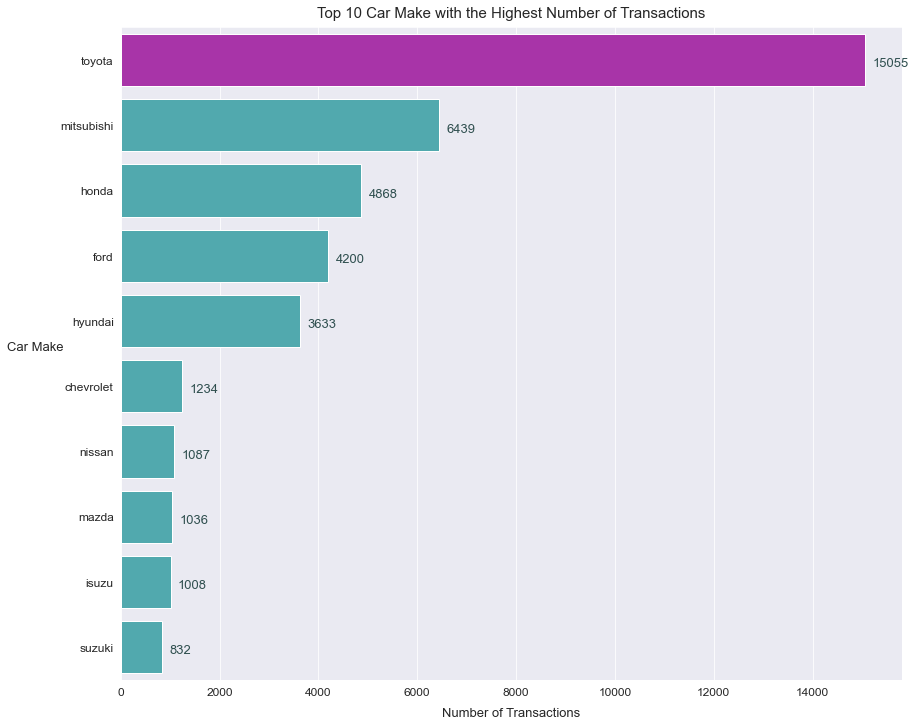

In [13]:
sns.set_style('darkgrid')
plt.figure(figsize = (14,12))
ax = sns.countplot(data = df, y = 'Make', order =df['Make'].value_counts().iloc[:10].index, color ='#42b7bd')

# Setting the annotations

# Setting the the largest value
patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
idx_tallest = np.argmax(patch_h) ## patch_h contains the heights of all the patches now
ax.patches[idx_tallest].set_facecolor('#a834a8') ## np.argmax return the index of largest value of the list 

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+150, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=13, color='darkslategray')

# Setting the labels and titles
plt.title('Top 10 Car Make with the Highest Number of Transactions', fontsize = 15, pad = 10)
plt.xlabel('Number of Transactions', fontsize = 13, labelpad = 10)
plt.ylabel('Car Make', fontsize = 13, labelpad = 25, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

In [14]:
df_top_10_transactions = df[df['Make'].isin(['toyota','mitsubishi','honda','ford','hyundai','chevrolet','nissan','mazda','isuzu','suzuki'])]
df_top_10_transactions

,Created,Year,Work Order,Mileage In,Make,Model,Service Category,Service Package,Description,Net Total,ServiceItemID,ContactID,InvoiceID,Line Type
0,2018-12-28 10:18:00,2012,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,696.43,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material
1,2018-12-28 10:18:00,2012,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,142.86,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material
2,2018-12-28 10:18:00,2012,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,227.68,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material
3,2018-12-28 10:18:00,2012,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,1339.29,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Labor
4,2018-12-28 10:18:00,2012,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,1178.56,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41022,2021-08-02 11:36:00,2020,2069,17900,mitsubishi,STRADA GLS 2.40,"Oil, Lube & Preventive Maintenance Service",Change Oil Package - SEMI Synthetic (8L),OIL FILTER,544.68,df0dc121-8015-4fc0-a865-9de2bbbc6778,fe5ff740-e6d6-4796-99b1-e727ab3b1cce,2200bd9d-70bd-4738-97ce-c8c19d20db31,Material
41024,2021-02-18 10:11:00,2009,2124,230201,mitsubishi,LANCER GLX 1.6,"Oil, Lube & Preventive Maintenance Service",CVI Complete Vehicle Inspection,Labor,446.43,063a40f9-8407-4903-8116-a24a408aa2ae,3c25ed67-a25e-4f2b-9b27-0203252c8b47,23c767ac-47e9-43d7-9c24-08c354024407,Labor
41025,2021-02-20 13:00:00,2015,2151,33842,mitsubishi,MIRAGE,Steering & Suspension,Complete Computerized Wheel Alignment (SEDAN),Labor,1339.29,e7de2b57-feca-48a9-9f4c-acd99785052d,1df471f1-c64d-40ff-82ac-9c6cd8aa8230,f669896f-8075-45e2-9a95-81091e67eafb,Labor
41026,2021-03-03 13:04:00,2014,2231,170588,toyota,VIOS,"Oil, Lube & Preventive Maintenance Service",COMPLETE VEHICLE INSPECTION,Labor,669.64,daf511d3-7db4-49b0-9c27-64ca0400a10d,49832654-8201-46a1-8332-b020426842c1,0fca6843-1fae-48b7-a4f8-537cf51e948e,Labor


### On average, how much does a car owner spend on maintenance and repair?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'ford'),
  Text(0, 1, 'chevrolet'),
  Text(0, 2, 'hyundai'),
  Text(0, 3, 'nissan'),
  Text(0, 4, 'toyota'),
  Text(0, 5, 'isuzu'),
  Text(0, 6, 'mazda'),
  Text(0, 7, 'mitsubishi'),
  Text(0, 8, 'honda'),
  Text(0, 9, 'suzuki')])

<Figure size 1008x864 with 0 Axes>

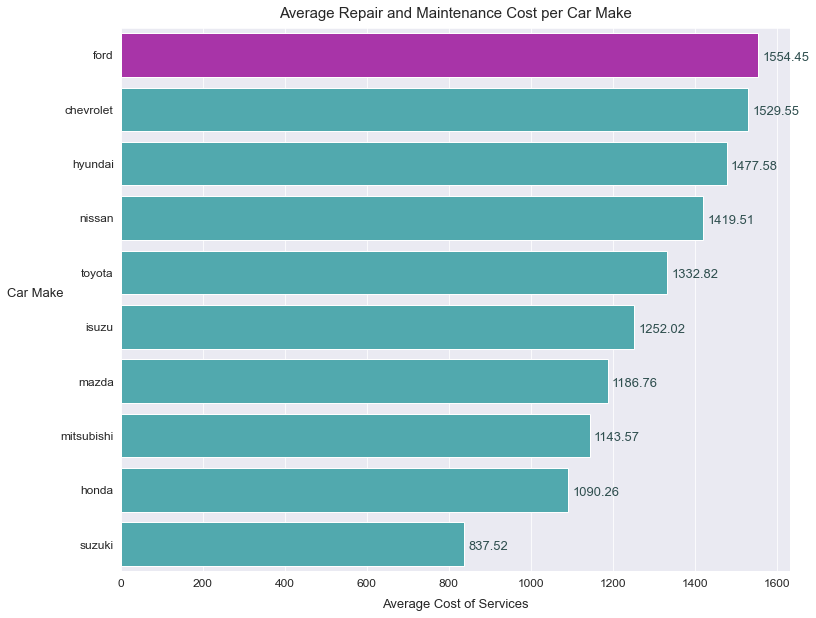

In [15]:
sns.set_style('darkgrid')
plt.figure(figsize = (14,12))

plt.figure(figsize = (12,10))
df_average_spend = df_top_10_transactions.groupby(['Make'])[['Net Total']].mean().sort_values(by ='Net Total', ascending = False).reset_index()
ax = sns.barplot(data = df_average_spend, y = 'Make', x = 'Net Total', color ='#42b7bd')

# Setting the annotations

# Setting the the largest value
patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
idx_tallest = np.argmax(patch_h) ## patch_h contains the heights of all the patches now
ax.patches[idx_tallest].set_facecolor('#a834a8') ## np.argmax return the index of largest value of the list

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+10, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=13, color='darkslategray')

# Setting the labels and titles
plt.title('Average Repair and Maintenance Cost per Car Make', fontsize = 15, pad = 10)
plt.xlabel('Average Cost of Services', fontsize = 13, labelpad = 10)
plt.ylabel('Car Make', fontsize = 13, labelpad = 25, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

### What are the usual transactions of every car owner?

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Oil, Lube & Preventive Maintenance Service'),
  Text(0, 1, 'Steering & Suspension'),
  Text(0, 2, 'Brakes'),
  Text(0, 3, 'HVAC (Heating, Ventilation & Air Conditioning)'),
  Text(0, 4, 'Transmission & Clutch'),
  Text(0, 5, 'Car Detailing Services'),
  Text(0, 6, 'Engine'),
  Text(0, 7, 'Driveability (Fuel, Ignition & Emission Systems)'),
  Text(0, 8, 'Tires & Wheels'),
  Text(0, 9, 'Cooling System'),
  Text(0, 10, 'Electrical (Belts, Lighting, Starting & Charging Systems)'),
  Text(0, 11, 'Valve Cover Gasket'),
  Text(0, 12, 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),
  Text(0, 13, 'Wheel Bearing'),
  Text(0, 14, 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),
  Text(0, 15, 'Batteries'),
  Text(0, 16, 'Sublet & Towing'),
  Text(0, 17, 'Counter / Cash Sale'),
  Text(0, 18, 'Exhaust')])

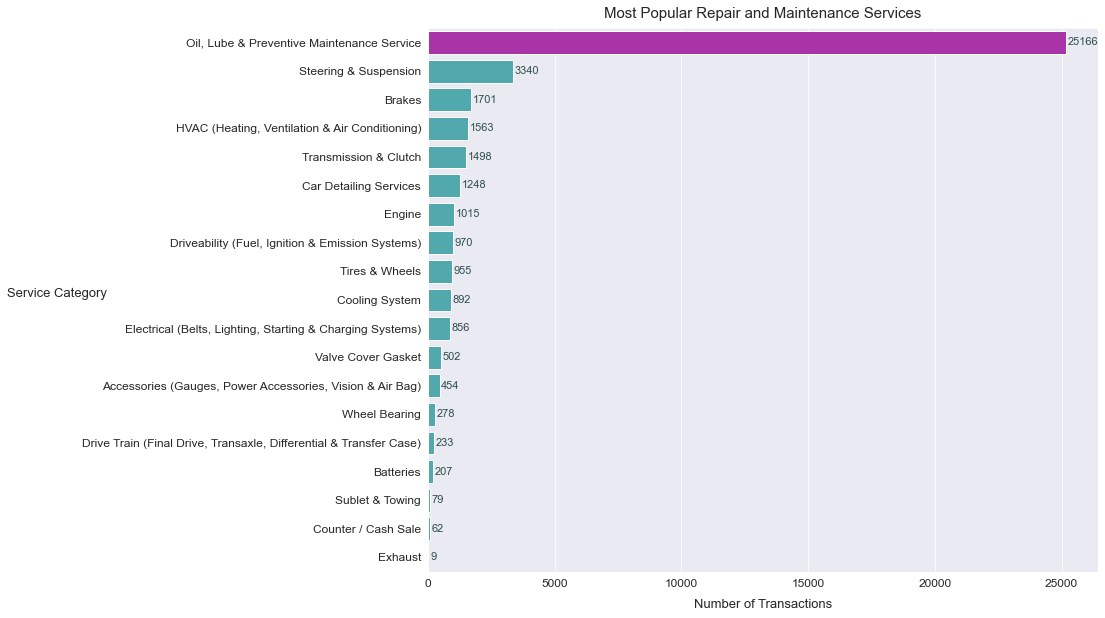

In [16]:
sns.set_style('darkgrid')
plt.figure(figsize = (12,10))
ax = sns.countplot(data = df, y = 'Service Category', order =df['Service Category'].value_counts().iloc[::].index, color ='#42b7bd')

# Setting the annotations

# Setting the the largest value
patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
idx_tallest = np.argmax(patch_h) ## patch_h contains the heights of all the patches now
ax.patches[idx_tallest].set_facecolor('#a834a8') ## np.argmax return the index of largest value of the list

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+70, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=11, color='darkslategray')

# Setting the labels and titles
plt.title('Most Popular Repair and Maintenance Services', fontsize = 15, pad = 10)
plt.xlabel('Number of Transactions', fontsize = 13, labelpad = 10)
plt.ylabel('Service Category', fontsize = 13, labelpad = 25, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Oil, Lube & Preventive Maintenance Service'),
  Text(0, 1, 'Steering & Suspension'),
  Text(0, 2, 'Transmission & Clutch'),
  Text(0, 3, 'Brakes'),
  Text(0, 4, 'HVAC (Heating, Ventilation & Air Conditioning)'),
  Text(0, 5, 'Engine'),
  Text(0, 6, 'Tires & Wheels'),
  Text(0, 7, 'Electrical (Belts, Lighting, Starting & Charging Systems)'),
  Text(0, 8, 'Driveability (Fuel, Ignition & Emission Systems)'),
  Text(0, 9, 'Cooling System'),
  Text(0, 10, 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),
  Text(0, 11, 'Wheel Bearing'),
  Text(0, 12, 'Valve Cover Gasket'),
  Text(0, 13, 'Batteries'),
  Text(0, 14, 'Car Detailing Services'),
  Text(0, 15, 'Sublet & Towing'),
  Text(0, 16, 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),
  Text(0, 17, 'Counter / Cash Sale'),
  Text(0, 18, 'Exhaust')])

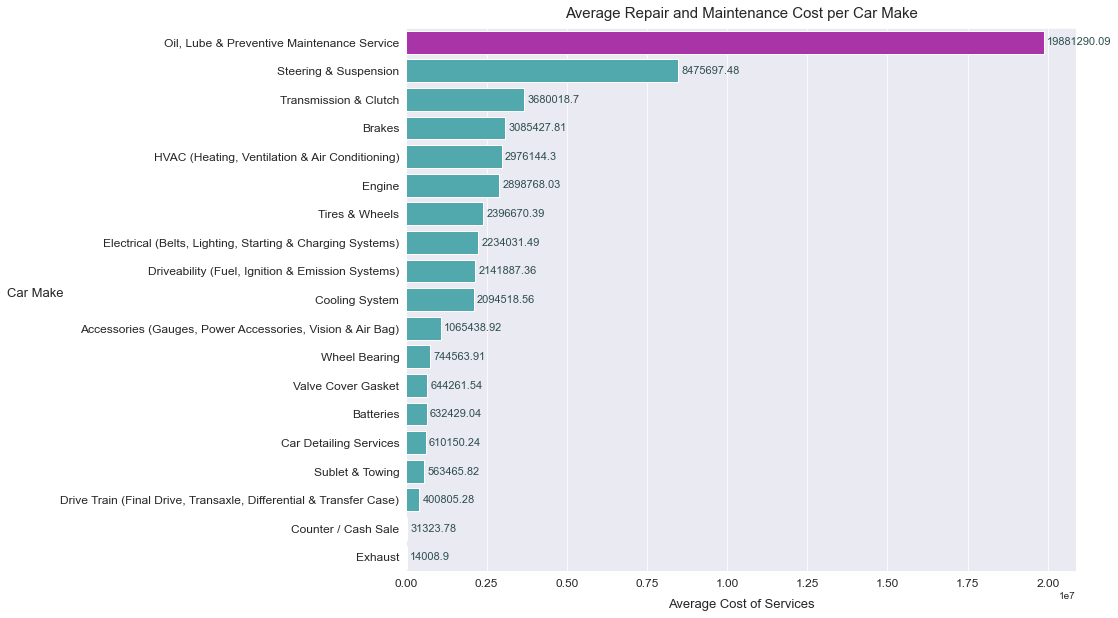

In [17]:
sns.set_style('darkgrid')

plt.figure(figsize = (12,10))
df_service_cost = df.groupby(['Service Category'])[['Net Total']].sum().sort_values(by ='Net Total', ascending = False).reset_index()
ax = sns.barplot(data = df_service_cost, y = 'Service Category', x = 'Net Total', color ='#42b7bd')

# Setting the annotations

# Setting the the largest value
patch_h = []    
for patch in ax.patches:
    reading = patch.get_height()
    patch_h.append(reading)
idx_tallest = np.argmax(patch_h) ## patch_h contains the heights of all the patches now
ax.patches[idx_tallest].set_facecolor('#a834a8') ## np.argmax return the index of largest value of the list

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+100000, i.get_y()+.5, \
            str(round((i.get_width()), 2)), fontsize=11, color='darkslategray')

# Setting the labels and titles
plt.title('Average Repair and Maintenance Cost per Car Make', fontsize = 15, pad = 10)
plt.xlabel('Average Cost of Services', fontsize = 13, labelpad = 10)
plt.ylabel('Car Make', fontsize = 13, labelpad = 25, rotation = 0)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

### What is the distribution of mileage?

<AxesSubplot:ylabel='Mileage In'>

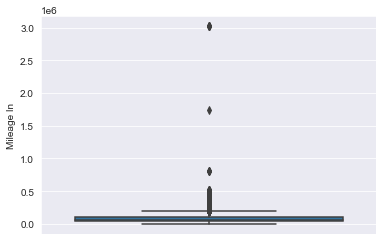

In [18]:
sns.boxplot(data = df, y = 'Mileage In')

In [19]:
df['Mileage In'].nsmallest(20)

561     0
562     0
563     0
564     0
565     0
566     0
567     0
568     0
569     0
570     0
571     0
572     0
573     0
574     0
575     0
576     0
3076    0
3077    0
3078    0
3079    0
Name: Mileage In, dtype: int64

In [20]:
df.loc[df['Mileage In'] < 1000,'Mileage In'].value_counts()

1      786
10      52
0       47
660     19
3        9
153      9
5        7
710      6
9        5
4        4
11       4
2        2
630      1
969      1
750      1
879      1
963      1
563      1
583      1
256      1
525      1
504      1
387      1
286      1
238      1
182      1
175      1
160      1
35       1
990      1
Name: Mileage In, dtype: int64

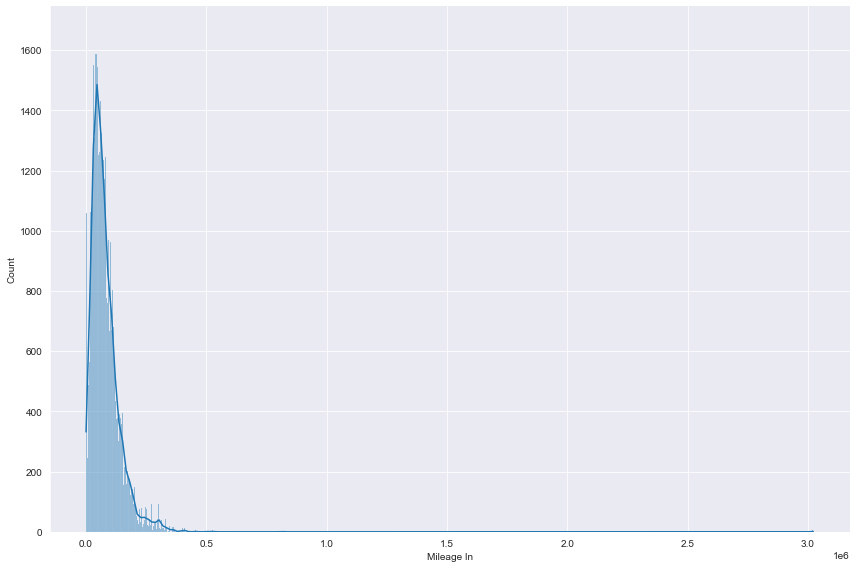

In [87]:
sns.displot(data = df[np.isfinite(df['Mileage In'])], x = 'Mileage In', kde = True, height = 8, aspect = 1.5)

## Feature Engineering

In [22]:
# Create time component columns to further investigate

df['Year'] = df['Created'].dt.year # Year column
# Month column
df['Month'] = df['Created'].dt.month 
df['Hour'] = df['Created'].dt.hour # Hour column

# Day column
df['Day'] = df['Created'].dt.dayofweek

In [23]:
df.head()

,Created,Year,Work Order,Mileage In,Make,Model,Service Category,Service Package,Description,Net Total,ServiceItemID,ContactID,InvoiceID,Line Type,Month,Hour,Day
0,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,696.43,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,4
1,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,142.86,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,4
2,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,227.68,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,4
3,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,1339.29,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Labor,12,10,4
4,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,1178.56,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,4


In [74]:
df_trial = df.copy()
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_trial['Day'] = df_trial['Day'].apply(lambda x: days[x])
df_trial.head()

,Created,Year,Work Order,Mileage In,Make,Model,Service Category,Service Package,Description,Net Total,ServiceItemID,ContactID,InvoiceID,Line Type,Month,Hour,Day
0,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,OIL FILTER HONDA,696.43,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,Friday
1,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,ENGINE FLUSHING,142.86,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,Friday
2,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,BRAKE CLEANER 14oz,227.68,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,Friday
3,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,Labor,1339.29,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Labor,12,10,Friday
4,2018-12-28 10:18:00,2018,49,33320,honda,Civic,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service (MEDIUM S...,REPSOL ELITE INJECTION 10W40 1L - GAS/DIESEL,1178.56,ff01e2a4-d2d5-48ff-8ccc-d5605a653df4,a271834a-1afc-4e62-8c71-638025174c1f,99833bf9-865b-4e2c-9bd1-a0ed0cebea8e,Material,12,10,Friday


In [86]:
df_trial.loc[(df_trial['Day'] == 'Saturday'),:]

,Created,Year,Work Order,Mileage In,Make,Model,Service Category,Service Package,Description,Net Total,ServiceItemID,ContactID,InvoiceID,Line Type,Month,Hour,Day
108,2019-01-05 08:42:00,2019,134,56789,suzuki,Suzuki,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service : Concern...,REPSOL ELITE COMMON RAIL SAE 5W30 1L,2428.56,dd9b1325-1f5f-4535-96b1-aa1d6c4a3af0,f0b2ff4b-f2a2-459b-ace5-b9bb5fccdde4,6cceebc3-2608-4ce8-9fe4-7ab3a0b7a8d5,Material,1,8,Saturday
109,2019-01-05 08:42:00,2019,134,56789,suzuki,Suzuki,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service : Concern...,OIL FILTER - ERTIGA,875.00,dd9b1325-1f5f-4535-96b1-aa1d6c4a3af0,f0b2ff4b-f2a2-459b-ace5-b9bb5fccdde4,6cceebc3-2608-4ce8-9fe4-7ab3a0b7a8d5,Material,1,8,Saturday
110,2019-01-05 08:42:00,2019,134,56789,suzuki,Suzuki,Steering & Suspension,"- Wheel Alignment Package - SUV (Small, Mediu...",Labor,1339.28,dd9b1325-1f5f-4535-96b1-aa1d6c4a3af0,f0b2ff4b-f2a2-459b-ace5-b9bb5fccdde4,6cceebc3-2608-4ce8-9fe4-7ab3a0b7a8d5,Labor,1,8,Saturday
111,2019-01-05 08:42:00,2019,134,56789,suzuki,Suzuki,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service : Concern...,ENGINE FLUSHING,142.85,dd9b1325-1f5f-4535-96b1-aa1d6c4a3af0,f0b2ff4b-f2a2-459b-ace5-b9bb5fccdde4,6cceebc3-2608-4ce8-9fe4-7ab3a0b7a8d5,Material,1,8,Saturday
112,2019-01-05 08:42:00,2019,134,56789,suzuki,Suzuki,"Oil, Lube & Preventive Maintenance Service",MINOR Preventive Maintenance Service : Concern...,BRAKE CLEANER 14oz,227.67,dd9b1325-1f5f-4535-96b1-aa1d6c4a3af0,f0b2ff4b-f2a2-459b-ace5-b9bb5fccdde4,6cceebc3-2608-4ce8-9fe4-7ab3a0b7a8d5,Material,1,8,Saturday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41005,2020-12-19 08:49:00,2020,1716,72786,isuzu,CROSSWIND,Steering & Suspension,Suspension General Service,machine shop,892.86,0b92fd5e-3316-4277-a355-a1e9cc1d1f7f,ac108e7d-ac88-4d06-a43b-40837c336b4d,95a2250e-b388-4ad9-9f6e-74cc956c473d,Sublet,12,8,Saturday
41006,2020-12-19 08:49:00,2020,1716,72786,isuzu,CROSSWIND,Steering & Suspension,Suspension General Service,BRAKE FLUIDS 150ml,178.56,0b92fd5e-3316-4277-a355-a1e9cc1d1f7f,ac108e7d-ac88-4d06-a43b-40837c336b4d,95a2250e-b388-4ad9-9f6e-74cc956c473d,Material,12,8,Saturday
41007,2020-12-19 08:49:00,2020,1716,72786,isuzu,CROSSWIND,Steering & Suspension,Complete Computerized Wheel Alignment,Labor,1517.86,0b92fd5e-3316-4277-a355-a1e9cc1d1f7f,ac108e7d-ac88-4d06-a43b-40837c336b4d,95a2250e-b388-4ad9-9f6e-74cc956c473d,Labor,12,8,Saturday
41023,2021-02-13 14:35:00,2021,2098,36364,mg,ZS,"Oil, Lube & Preventive Maintenance Service",CHANGE SPARK PLUG ( CUSTOMER SUPPLY),Labor,669.64,7b428b9d-998b-4694-89fe-028d81363525,305dd8bb-1ab7-4c2b-9990-0f7913409db7,f1a9b0a8-a0bd-4923-a965-d0642909e273,Labor,2,14,Saturday


In [25]:
# df_day_mean = df.groupby(['Day']).mean().reset_index(name = 'Counts').sort_values(by = 'Day')

In [70]:
df_day.describe(include = [object])

,Day
count,7
unique,7
top,Friday
freq,1


In [26]:
df_day = df.groupby(['Day']).size().reset_index(name = 'Counts').sort_values(by = 'Day')
days = {0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunday'}
df_day['Day'] = df_day['Day'].apply(lambda x: days[x])
df_day

,Day,Counts
0,Monday,5705
1,Tuesday,6260
2,Wednesday,6158
3,Thursday,5924
4,Friday,6328
5,Saturday,7763
6,Sunday,2890


(array([2000., 3000., 4000., 5000., 6000., 7000., 8000., 9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

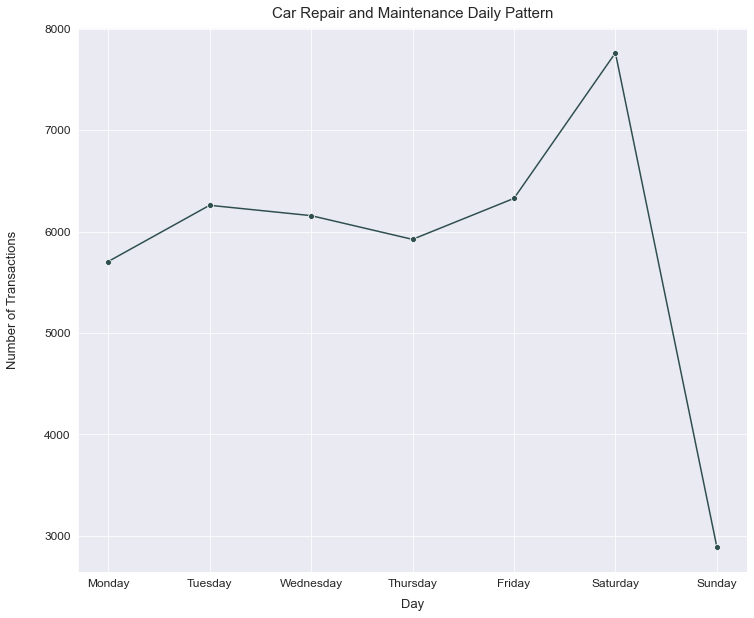

In [27]:
## Daily Pattern

plt.figure(figsize = (12,10))
ax = sns.lineplot(data = df_day, x = 'Day' , y = 'Counts', color = 'darkslategray', marker ='o')
plt.title('Car Repair and Maintenance Daily Pattern', fontsize = 15, pad = 10)
plt.xlabel('Day', fontsize = 13, labelpad = 10)
plt.ylabel('Number of Transactions', fontsize = 13, labelpad = 25)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

(array([-1000.,     0.,  1000.,  2000.,  3000.,  4000.,  5000.,  6000.,
         7000.,  8000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

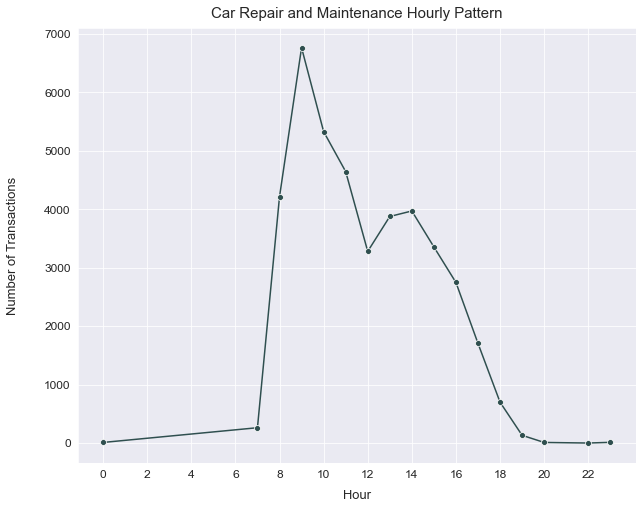

In [28]:
## Hourly Pattern

# Setting the data to hours
df_hour = df.groupby(['Hour']).size().reset_index(name = 'Counts')

#Setting the general information
plt.figure(figsize = (10,8))
ax = sns.lineplot(data = df_hour, x = 'Hour' , y = 'Counts',color = 'darkslategray',marker ='o')
plt.title('Car Repair and Maintenance Hourly Pattern', fontsize = 15, pad = 10)
plt.xlabel('Hour', fontsize = 13, labelpad = 10)
plt.ylabel('Number of Transactions', fontsize = 13, labelpad = 25)
plt.xticks(np.arange(0,24,2),fontsize = 12)
plt.yticks(fontsize = 12)

In [29]:
months = {1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'}
df_month = df.groupby(['Month']).size().reset_index(name = 'Counts')
df_month['Month'] = df_month['Month'].apply(lambda x: months[x])
df_month

,Month,Counts
0,January,5432
1,February,3931
2,March,3379
3,April,1875
4,May,2765
5,June,2856
6,July,4069
7,August,3126
8,September,3244
9,October,3472


(array([1500., 2000., 2500., 3000., 3500., 4000., 4500., 5000., 5500.,
        6000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

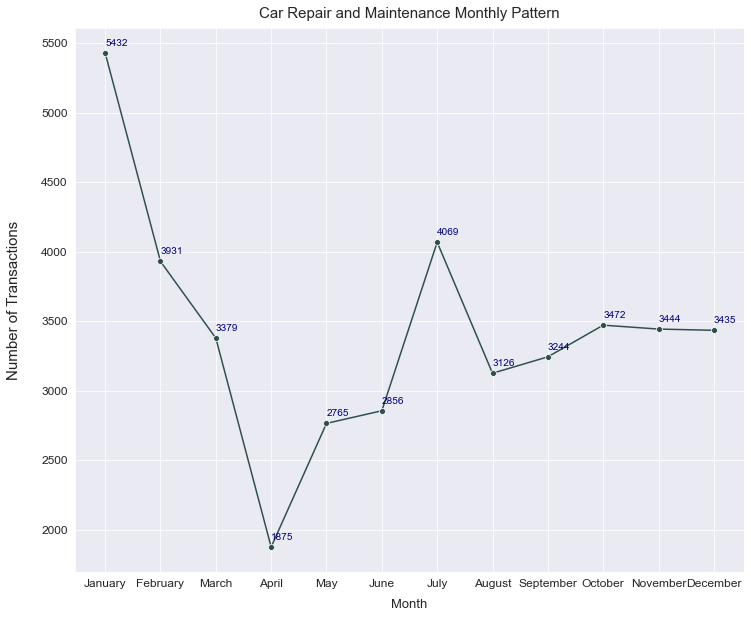

In [30]:
## Monthly Pattern

plt.figure(figsize = (12,10))
ax = sns.lineplot(data = df_month, x = 'Month' , y = 'Counts', color = 'darkslategray',marker = 'o')

#Setting the the labels on the plot
for x, y in zip(df_month['Month'], df_month['Counts']):
 # the position of the data label relative to the data point can be adjusted by adding/subtracting a value from the x &/ y coordinates
 plt.text(x = x, # x-coordinate position of data label
 y = y+50, # y-coordinate position of data label, adjusted to be 150 below the data point
 s = '{:.0f}'.format(y), # data label, formatted to ignore decimals
 color = 'navy') # set colour of line

#Setting the general information
plt.title('Car Repair and Maintenance Monthly Pattern', fontsize = 15, pad = 10)
plt.xlabel('Month', fontsize = 13, labelpad = 10)
plt.ylabel('Number of Transactions', fontsize = 15, labelpad = 20)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)

### Label Clustering: We will use the original dataframe to include all possible categories

In [31]:
df_original['Service Category'].unique()

array(['Oil, Lube & Preventive Maintenance Service', 'Sublet & Towing',
       'Engine',
       'Electrical (Belts, Lighting, Starting & Charging Systems)',
       'Tires & Wheels',
       'Driveability (Fuel, Ignition & Emission Systems)',
       'Steering & Suspension', 'Brakes', 'Cooling System',
       'Car Detailing Services', 'Transmission & Clutch',
       'Accessories (Gauges, Power Accessories, Vision & Air Bag)',
       'Counter / Cash Sale',
       'HVAC (Heating, Ventilation & Air Conditioning)',
       'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)',
       'Batteries', 'Exhaust', 'Shop Internal Warranty'], dtype=object)

### Tires & Wheels

In [32]:
# Tires and Wheels

df_tw = df_original.loc[(df_original['Service Category'] == 'Tires & Wheels'),:]

In [33]:
# # Code for Reproduceability

# def tires_wheels_clustering(dataset):
#   df_tw = dataset.loc[(dataset['Service Category'] == 'Tires & Wheels'),:]

#   # Replace Mount to Mount, Install, & Balance
#   df_tw.loc[df_tw['Service Package'].str.contains('Mount', case = False),'Service Package'] = 'Mount, Install, & Balance'
#   df_tw.loc[df_tw['Service Package'].str.contains('Balance'),'Service Package'] = 'Mount, Install, & Balance'
#   df_tw.loc[df_tw['Service Package'].str.contains('Balancing', case = False),'Service Package'] = 'Mount, Install, & Balance'

#   # Map Tire Replacement to all values that contain replacement
#   df_tw.loc[df_tw['Service Package'].str.contains('Replace'),'Service Package'] = 'Tire Replacement'
#   df_tw.loc[df_tw['Service Package'].str.contains('REPLACEMENT', case = False),'Service Package'] = 'Tire Replacement'

#   # Tire Vulcanizing
#   df_tw.loc[df_tw['Service Package'].str.contains('Vulcan'),'Service Package'] = 'Tire Vulcanizing'

#   # Tire Rotation
#   df_tw.loc[df_tw['Service Package'].str.contains('Rotat'),'Service Package'] = 'Tire Rotation'

#   # Other General Services
#   df_tw.loc[~df_tw['Service Package'].isin(['Mount, Install, & Balance','Tire Rotation','Tire Vulcanizing','Tire Replacement']),'Service Package'] = 'Other General Services'

# tires_wheels_clustering

In [34]:
df_tw['Service Package'].value_counts()

Mount, Install & Balance 4 Tires                                   145
Mount, Install & Balance 2 Tires                                    82
VPX-FLEET - Mount, Install & Balance 4 Tires w/ Wheel Alignment     48
Mount & Install 4 Tires                                             39
Mount & Install 2 Tires                                             28
                                                                  ... 
Balance 3 Tires (PICK-UP)                                            1
SWAP 4 PCS TIRES TO PLATE # ZML246                                   1
ADDITIONAL PAYMENT/CHARGE FOR UPGRADE TIRE                           1
MOUNTING 1 Tire (SEDAN)                                              1
Tire(s) Concern                                                      1
Name: Service Package, Length: 165, dtype: int64

### Accessories

In [35]:
## This is for accessories
df_acc = df_original.loc[(df_original['Service Category'] == 'Accessories (Gauges, Power Accessories, Vision & Air Bag)'),:]

In [36]:
# df_acc.loc[df_acc['Service Package'].str.contains('wiper', case = False),'Service Package'] = 'Windshield Wiper Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('wind', case = False),'Service Package'] = 'Windshield Wiper Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('door', case = False),'Service Package'] = 'Door Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('window', case = False),'Service Package'] = 'Power Window Servicing'
# df_acc.loc[df_acc['Service Package'].str.contains('power accessories', case = False),'Service Package'] = 'Power Accessories General Service'
# df_acc.loc[df_acc['Service Package'].str.contains('general', case = False),'Service Package'] = 'Accessories General Service'
# df_acc.loc[df_acc['Service Package'].str.contains('horn', case = False),'Service Package'] = 'Car Horn Repair & Services'
# df_acc.loc[df_acc['Service Package'].str.contains('seat', case = False),'Service Package'] = 'Car Seat Services'
# df_acc.loc[df_acc['Service Package'].str.contains('Hood', case = False),'Service Package'] = 'Car Hood Services'
# df_acc.loc[~df_acc['Service Package'].isin(['Windshield Wiper Servicing','Door Servicing','Power Window Servicing','Power Accessories General Service'
#                                            ,'Accessories General Service','Car Horn Repair & Services',
#                                            'Car Seat Services','Car Hood Services']),'Service Package'] = 'Other Accessories Services'


In [37]:
df_acc.loc[~df_acc['Service Package'].isin(['Windshield Wiper Servicing','Door Servicing','Power Window Servicing','Power Accessories General Service'
                                           ,'Accessories General Service','Car Horn Repair & Services',
                                           'Car Seat Services','Car Hood Services']),'Service Package'] = 'Other Accessories Services'

C:\Users\justine.padayao\Anaconda3\envs\Data Science\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [38]:
df_acc.loc[df_acc['Service Package'].str.contains('hood', case = False),'Service Package'].value_counts()

Series([], Name: Service Package, dtype: int64)

In [39]:
df_acc['Service Package'].value_counts()

Other Accessories Services    472
Name: Service Package, dtype: int64

### Counter / Cash Sale

In [40]:
df_ccs = df_original.loc[(df_original['Service Category'] == 'Counter / Cash Sale'),:]

In [41]:
# df_ccs.loc[df_ccs['Service Package'].str.contains('Counter', case = False),'Service Package'] = 'Counter / Cash Sale'
# df_ccs.loc[df_ccs['Service Package'].str.contains('Tools', case = False),'Service Package'] = 'Tools and Equipment'
# df_ccs.loc[~df_ccs['Service Package'].isin(['Counter / Cash Sale','Tools and Equipment']),'Service Package'] = 'Other Requests'

In [42]:
df_ccs.loc[~df_ccs['Service Package'].isin(['Counter / Cash Sale','Tools and Equipment']),'Service Package'] = 'Other Requests'

In [43]:
df_ccs['Service Package'].value_counts()

Counter / Cash Sale    1436
Other Requests          116
Name: Service Package, dtype: int64

### HVAC

In [44]:
## This is for HVAC
df_hvac = df_original.loc[(df_original['Service Category'] == 'HVAC (Heating, Ventilation & Air Conditioning)'),:]

In [45]:
## General Services

# df_hvac.loc[df_hvac['Service Package'].str.contains('general', case = False),'Service Package'] = 'Air Conditioner General Cleaning Service'
# df_hvac.loc[df_hvac['Service Package'].str.contains('vacuum', case = False),'Service Package'] = 'Vacuum/Charging Service'
# df_hvac.loc[df_hvac['Service Package'].str.contains('repair', case = False),'Service Package'] = 'Air Conditioner General Repair Service'

## Specific Services

# df_hvac.loc[df_hvac['Service Package'].str.contains('filter', case = False),'Service Package'] = 'Cabin Air Filter'
# df_hvac.loc[df_hvac['Service Package'].str.contains('compressor', case = False),'Service Package'] = 'Air Conditioning Compressor'
# df_hvac.loc[df_hvac['Service Package'].str.contains('evaporator', case = False),'Service Package'] = 'Air Conditioner Evaporator'
# df_hvac.loc[df_hvac['Service Package'].str.contains('blower', case = False),'Service Package'] = 'Blower Motor Assembly'
# df_hvac.loc[df_hvac['Service Package'].str.contains('fan', case = False),'Service Package'] = 'Air Conditioner Fan Motor'

## Other Services

# df_hvac.loc[~df_hvac['Service Package'].isin(['Air Conditioner General Cleaning Service','Vacuum/Charging Service','Air Conditioning Compressor'
#                                              ,'Cabin Air Filter','Air Conditioner General Repair Service',
#                                              'Air Conditioner Evaporator','Blower Motor Assembly','Air Conditioner Fan Motor']
#                                             ),'Service Package'] = 'Other Air Conditioning Concerns'

In [46]:
df_hvac['Service Package'].value_counts()

GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SEDAN)                                           292
GENERAL A/C CLEANING (PULL-DOWN DASHBOARD - SUV & PICK-UP)                                   245
VACUUM/CHARGING - (SEDAN)                                                                    153
VACUUM/CHARGING - (SUV & PICK-UP)                                                            106
Cabin Air Filter                                                                              43
                                                                                            ... 
Re-checking Water Leak at Frt. Passenger (newly A/C General Cleaning)                          1
Air Conditioning System Pinpoint Inspection with Scanning                                      1
Repair Air Conditioning Hose                                                                   1
Air Conditioning Hose Hi-Side Crim (Machine Shop)                                              1
 Diagnose Air Conditioning Sys

### Drive Train

In [47]:
## This is for drive train
df_dt = df_original.loc[(df_original['Service Category'] == 'Drive Train (Final Drive, Transaxle, Differential & Transfer Case)'),:]

In [48]:
# # Clustering of Drive Shaft

# df_dt.loc[df_dt['Service Package'].str.contains('Drive Shaft', case = False),'Service Package'] = 'Servicing of Drive Shaft'
# df_dt.loc[df_dt['Service Package'].str.contains('DriveShaft', case = False),'Service Package'] = 'Servicing of Drive Shaft'
# df_dt.loc[df_dt['Service Package'].str.contains('Oil Seal', case = False),'Service Package'] = 'Servicing of Drive Shaft'
# df_dt.loc[df_dt['Service Package'].str.contains('oilseal', case = False),'Service Package'] = 'Servicing of Drive Shaft'

# # Clustering of Differential Fluid Exchange

# df_dt.loc[df_dt['Service Package'].str.contains('fluid', case = False),'Service Package'] = 'Differential Fluid Exchange'

# # Clustering of Axle Shaft
# df_dt.loc[df_dt['Service Package'].str.contains('Axle', case = False),'Service Package'] = 'Servicing of Axle Shaft'

# # Other Drive Train Services
# df_dt.loc[~df_dt['Service Package'].isin(['Servicing of Drive Shaft','Servicing of Axle Shaft','Differential Fluid Exchange']),'Service Package'] = 'Other General Drive Train Services'

In [49]:
df_dt['Service Package'].value_counts()

Differential Fluid Exchange                                                                                     17
Replace Differential Oil, Transmission Oil, Power Steering Fluid, Brake fluid, Coolant                           8
Axle Shaft Seal (Main Concern) - Oil Leak Rear RH                                                                7
Constant Velocity Axle Assembly, Front  (Safety Related Concern)                                                 7
Replacement of Drive Shaft Boot                                                                                  7
Replacement of CV Joint (Tok Noise Concern)                                                                      7
Constant Velocity Joint Boot, Front Axle                                                                         7
Replace Frt. Rh Drive Shaft Boot Inner / Outer                                                                   7
Driveshaft Repack and Replacement of Driveshaft Boot                            

### Batteries

In [50]:
## This is for drive train
df_batt = df_original.loc[(df_original['Service Category'] == 'Batteries'),:]

In [51]:
# Clustering of Battery Replacement
df_batt.loc[df_batt['Service Package'].str.contains('replace', case = False),'Service Package'] = 'Battery Replacement'
df_batt.loc[df_batt['Service Package'].str.contains('change', case = False),'Service Package'] = 'Battery Replacement'

# Clustering of General Battery Services
df_batt.loc[df_batt['Service Package'].str.contains('jump', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('charge', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('start', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('test', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('general', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'
df_batt.loc[df_batt['Service Package'].str.contains('service', case = False),'Service Package'] = 'Battery General Services (Charge, Test, Start)'

# Clustering of Other Services as recommended by the Preventive Maintenance Schedule
df_batt.loc[~df_batt['Service Package'].isin(['Battery Replacement','Battery General Services (Charge, Test, Start)']),'Service Package'] = 'Other Services (PMS Recommendaton)'

In [52]:
df_batt['Service Package'].value_counts()

Battery Replacement                               151
Battery General Services (Charge, Test, Start)     37
Other Services (PMS Recommendaton)                 25
Name: Service Package, dtype: int64

### Sublet & Towing

In [53]:
## This is for drive train
df_sublet = df_original.loc[(df_original['Service Category'] == 'Sublet & Towing'),:]

In [54]:
df_sublet.loc[df_sublet['Service Package'].str.contains('repair', case = False),'Service Package'] = 'Body Repair and Paint Works'
df_sublet.loc[df_sublet['Service Package'].str.contains('towing', case = False),'Service Package'] = 'Towing'
df_sublet.loc[~df_sublet['Service Package'].isin(['Body Repair and Paint Works','Towing']),'Service Package'] = 'Other Sublet Services (Machine Shop)'

In [55]:
df_sublet['Service Package'].value_counts()

Body Repair and Paint Works             35
Other Sublet Services (Machine Shop)    30
Towing                                  19
Name: Service Package, dtype: int64

### Break Function

In [56]:
df_break = df_original.loc[(df_original['Service Category'] == 'Brakes'),:]

In [57]:
df_break.loc[df_break['Service Package'].str.contains('pad', case = False),'Service Package'] = 'Disc Brake Pad'
df_break.loc[df_break['Service Package'].str.contains('general', case = False),'Service Package'] = 'Brake System General Service'
df_break.loc[df_break['Service Package'].str.contains('disc brake rotors', case = False),'Service Package'] = 'Disc Brake Rotors'
df_break.loc[df_break['Service Package'].str.contains('disc brake caliper', case = False),'Service Package'] = 'Disc Brake Caliper'
df_break.loc[df_break['Service Package'].str.contains('disc brake hardware kit', case = False),'Service Package'] = 'Disc Brake Hardware'
df_break.loc[df_break['Service Package'].str.contains('disc brake service', case = False),'Service Package'] = 'Disc Brake Hardware'
df_break.loc[df_break['Service Package'].str.contains('brake wheel', case = False),'Service Package'] = 'Drum Brake Wheel'
df_break.loc[df_break['Service Package'].str.contains('caliper', case = False),'Service Package'] = 'Disc Brake Caliper'
df_break.loc[df_break['Service Package'].str.contains('bearing', case = False),'Service Package'] = 'Wheel Bearing'
df_break.loc[df_break['Service Package'].str.contains('fluid', case = False),'Service Package'] = 'Brake Fluid Service (Exchange, System Flush, Bleeding)'
df_break.loc[df_break['Service Package'].str.contains('clean', case = False),'Service Package'] = 'Brake Cleaning Service'
df_break.loc[df_break['Service Package'].str.contains('shoes', case = False),'Service Package'] = 'Drum Brake Shoes'
df_break.loc[df_break['Service Package'].str.contains('cylinder', case = False),'Service Package'] = 'Brake Master Cylinder'
df_break.loc[df_break['Service Package'].str.contains('light', case = False),'Service Package'] = 'Brake Light System'
df_break.loc[df_break['Service Package'].str.contains('recommend', case = False),'Service Package'] = 'Preventive Maintenance System Recommendation'
df_break.loc[df_break['Service Package'].str.contains('bleed', case = False),'Service Package'] = 'Brake Fluid Service (Exchange, System Flush, Bleeding)'
df_break.loc[df_break['Service Package'].str.contains('brake system', case = False),'Service Package'] = 'Brake System General Service'
df_break.loc[df_break['Service Package'].str.contains('sensor', case = False),'Service Package'] = 'ABS Wheel Speed Sensor'
df_break.loc[~df_break['Service Package'].isin(['Disc Brake Pad','Brake System General Service','Disc Brake Rotors',
                                                 'Disc Brake Caliper','Drum Brake Wheel',
                                                 'Wheel Bearing','Brake Fluid Service (Exchange, System Flush, Bleeding)',
                                                 'Brake Cleaning Service','Drum Brake Shoes','Brake Master Cylinder',
                                                 'Brake Light System','Preventive Maintenance System Recommendation',
                                                 ]),'Service Package'] = 'Other Brake Services'

In [58]:
df_break.loc[df_break['Service Package'].str.contains('cylinder', case = False),'Service Package'] = 'Brake System General Service'

In [59]:
df_break.loc[df_break['Service Package'].str.contains('sensor', case = False),'Service Package'].value_counts()

Series([], Name: Service Package, dtype: int64)

In [60]:
df_break['Service Package'].value_counts().head(50)

Disc Brake Pad                                            676
Brake System General Service                              274
Wheel Bearing                                             233
Disc Brake Caliper                                        134
Brake Cleaning Service                                    119
Drum Brake Wheel                                          117
Brake Fluid Service (Exchange, System Flush, Bleeding)    106
Disc Brake Rotors                                         100
Other Brake Services                                       97
Preventive Maintenance System Recommendation               35
Drum Brake Shoes                                           29
Brake Light System                                         26
Name: Service Package, dtype: int64

## Cleaning the year value

In [88]:
df_original['Year'].value_counts()

2014.0     5230
2015.0     4821
2016.0     4082
2017.0     3320
2013.0     3235
0.0        2928
2010.0     2595
2011.0     2524
2012.0     2299
2008.0     1644
2018.0     1604
2009.0     1094
2007.0      903
2005.0      831
2006.0      813
2004.0      618
2019.0      591
2002.0      461
2003.0      424
2000.0      271
2020.0      204
1997.0      152
2001.0      105
1998.0       89
1996.0       77
1999.0       71
1995.0       51
1994.0       39
2021.0       18
1969.0       16
83151.0      14
1991.0       13
1992.0       12
2099.0        7
201.0         7
1973.0        6
1993.0        5
200.0         3
1987.0        1
89.0          1
1990.0        1
1989.0        1
2500.0        1
Name: Year, dtype: int64

In [61]:
df_year_zero = df_original.loc[df_original['Year'] == 0,:]

In [62]:
# Drop the null values for VIN
df_year_zero.dropna(subset = ['VIN'], inplace = True)

<ipython-input-62-0292849b3ef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_year_zero.dropna(subset = ['VIN'], inplace = True)


In [63]:
df_year_zero.head()

,Created,Mileage In,Mileage Out,Work Order,Year,Make,Model,Submodel,Engine,VIN,Unit,Color,Line Type,Profit Center,Service Category,Code,Service Package,Part Number,Description,Manufacturer,Definition,Price,Quantity,Total,Discount,Net Total,ContactID,ServiceItemID,InvoiceID,DefinitionID
355,2019-01-08 14:38:02,95012,95013,193,0.0,Ford,Explorer,NaN,NaN,1FM5K7F92DGC75683,NaN,NaN,Labor,Automotive Service,Engine,NaN,Motor Mount(s) Engine / Transmission,NaN,Labor,NaN,NaN,446.43,6.5,2901.80,0.0,2901.80,50c91e4f-838b-4998-885c-cfd1a0eb0d80,540222d1-3e2d-4755-8e27-cb2fe9e6a523,7c5b8e92-ea12-4da8-841f-9da537932535,NaN
356,2019-01-08 14:38:02,95012,95013,193,0.0,Ford,Explorer,NaN,NaN,1FM5K7F92DGC75683,NaN,NaN,Material,Automotive Service,Steering & Suspension,NaN,Suspension General Service,FOR-L2000-EXP,LIFTER PADS RR W/COILSTOPER,AFTERMARKET,NaN,1332.59,2.0,2665.18,0.0,2665.18,50c91e4f-838b-4998-885c-cfd1a0eb0d80,540222d1-3e2d-4755-8e27-cb2fe9e6a523,7c5b8e92-ea12-4da8-841f-9da537932535,NaN
357,2019-01-08 14:38:02,95012,95013,193,0.0,Ford,Explorer,NaN,NaN,1FM5K7F92DGC75683,NaN,NaN,Material,Automotive Service,Steering & Suspension,NaN,Suspension General Service,FOR-MEF-150,Front stab link,FORD,NaN,5000.00,2.0,10000.00,0.0,10000.00,50c91e4f-838b-4998-885c-cfd1a0eb0d80,540222d1-3e2d-4755-8e27-cb2fe9e6a523,7c5b8e92-ea12-4da8-841f-9da537932535,NaN
358,2019-01-08 14:38:02,95012,95013,193,0.0,Ford,Explorer,NaN,NaN,1FM5K7F92DGC75683,NaN,NaN,Labor,Automotive Service,Steering & Suspension,NaN,Suspension General Service,NaN,Labor,NaN,NaN,446.43,8.0,3571.44,0.0,3571.44,50c91e4f-838b-4998-885c-cfd1a0eb0d80,540222d1-3e2d-4755-8e27-cb2fe9e6a523,7c5b8e92-ea12-4da8-841f-9da537932535,NaN
359,2019-01-08 14:38:02,95012,95013,193,0.0,Ford,Explorer,NaN,NaN,1FM5K7F92DGC75683,NaN,NaN,Material,Automotive Service,Engine,NaN,Valve Cover Gasket(s),SIL-MG-RTV-SIL,SILOCK METALLIC GREY RTV SILICONE 100G,SILOCK,NaN,263.38,1.0,263.38,0.0,263.38,50c91e4f-838b-4998-885c-cfd1a0eb0d80,540222d1-3e2d-4755-8e27-cb2fe9e6a523,7c5b8e92-ea12-4da8-841f-9da537932535,NaN


In [64]:
# KMFZBX7BAEU009739 is 2013 Hyundai H100
df_year_zero.loc[df_year_zero['VIN'] == 'KMFZBX7BAEU009739','Year'] = 2013

# MR053HY4109007212 is 2005 Toyota Suluna Vios
df_year_zero.loc[df_year_zero['VIN'] == 'MR053HY4109007212','Year'] = 2005

# MMBGRKG40BF020071 is 2011 Mitsubishi Vativa/ Paj Sport
df_year_zero.loc[df_year_zero['VIN'] == 'MMBGRKG40BF020071','Year'] = 2011

# MRHCP26209P020051 is 2009 Honda
df_year_zero.loc[df_year_zero['VIN'] == 'MRHCP26209P020051','Year'] = 2009

# JF1SHSLS59G019887 is 2009 Subaru
df_year_zero.loc[df_year_zero['VIN'] == 'JF1SHSLS59G019887','Year'] = 2009

# MMMA69B1EH7054733 is 1987
df_year_zero.loc[df_year_zero['VIN'] == 'MMMA69B1EH7054733','Year'] = 1987

# JMYLYV98WDJ000492 is 2013 Pajero
df_year_zero.loc[df_year_zero['VIN'] == 'JMYLYV98WDJ000492','Year'] = 2013

# JTMZD31V405085757 is 2008 Toyota Rav 4
df_year_zero.loc[df_year_zero['VIN'] == 'JMYLYV98WDJ000492','Year'] = 2008

#PAEL65MYEDB010311 is 2013 Mitsubishi
df_year_zero.loc[df_year_zero['VIN'] == 'PAEL65MYEDB010311','Year'] = 2013

#KMHBT51DP8U838103 is 2008 Hyundai Getz
df_year_zero.loc[df_year_zero['VIN'] == 'KMHBT51DP8U838103','Year'] = 2008

#PADGM663OEV002809 is 2014 Honda
df_year_zero.loc[df_year_zero['VIN'] == 'PADGM663OEV002809','Year'] = 2014

# MR0ES12G003041038 is 2012 Hilux
df_year_zero.loc[df_year_zero['VIN'] == 'MR0ES12G003041038','Year'] = 2012

# MPBSXXMXKSEB87874 - 1995 Ford Ecosport
df_year_zero.loc[df_year_zero['VIN'] == 'MPBSXXMXKSEB87874','Year'] = 1995

# MPAUCR85H81100056 - 2008 Chevrolet
df_year_zero.loc[df_year_zero['VIN'] == 'MPAUCR85H81100056','Year'] = 2008

# MPBSXXMXKSGR39030 - 1995 Ford Ecosport
df_year_zero.loc[df_year_zero['VIN'] == 'MPBSXXMXKSGR39030','Year'] = 1995

# MMBXTA03AGH007599 - 2016 Mitsubishi Mirage
df_year_zero.loc[df_year_zero['VIN'] == 'MMBXTA03AGH007599','Year'] = 2016

# MMBJNKA40AD000947 - 2000 Mitsubishi 
df_year_zero.loc[df_year_zero['VIN'] == 'MMBJNKA40AD000947','Year'] = 2000

# PAEL35MYFFB024336 - 2015 Mitsubishi
df_year_zero.loc[df_year_zero['VIN'] == 'PAEL35MYFFB024336','Year'] = 2015

# MHKA4D4E3F05002474 - 2015 Daihatsu
df_year_zero.loc[df_year_zero['VIN'] == 'MHKA4D4E3F05002474','Year'] = 2015

# PADGM26509V002527 - 2009 Honda
df_year_zero.loc[df_year_zero['VIN'] == 'PADGM26509V002527','Year'] = 2009

# MHFMICF3F8K002745 - 2008 Toyota Avanze
df_year_zero.loc[df_year_zero['VIN'] == 'MHFMICF3F8K002745','Year'] = 2008

# MR0RER32G506012818 - 2005 Toyota
df_year_zero.loc[df_year_zero['VIN'] == 'MR0RER32G506012818','Year'] = 2005

# KL1SF6971AH200854 - 2010 Chevrolet
df_year_zero.loc[df_year_zero['VIN'] == 'KL1SF6971AH200854','Year'] = 2010


# MNCUMFF50FW452634 - 2015 Ford Ranger
df_year_zero.loc[df_year_zero['VIN'] == 'MNCUMFF50FW452634','Year'] = 2015

# MMM156MH0DHB63080 - 2013 Chevrolet
df_year_zero.loc[df_year_zero['VIN'] == 'MMM156MH0DHB63080','Year'] = 2013

# MPBSXXMXKSES62788 - 1995 Ford Ecosport
df_year_zero.loc[df_year_zero['VIN'] == 'MPBSXXMXKSES62788','Year'] = 1995




C:\Users\justine.padayao\Anaconda3\envs\Data Science\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [65]:
df_year_zero.loc[df_year_zero['VIN'] == 'MRHCP26209P020051','Year'] = 2005

In [66]:
df_year_zero['VIN'].value_counts().head(50)

KMFZBX7BAEU009739     60
MR053HY4109007212     59
MMBGRKG40BF020071     51
MRHCP26209P020051     49
JF1SHSLS59G019887     41
MMMA69B1EH7054733     40
JMYLYV98WDJ000492     38
JTMZD31V405085757     37
KUN405040969*****     34
PHS043B9571******     33
PAEL65MYEDB010311     33
KF80L-GRMREM          30
N5P15GL-BEXRKM***     28
KMHBT51DP8U838103     25
00000KUN40LGKMRYM     23
NCP929062458*****     22
ZZE121-8016204***     22
PADGM663OEV002809     19
MR0ES12G003041038     19
MPAUCR86GGT002149     19
KUN60L-EKPSHI,,,,     19
MPBSXXMXKSEB87874     18
MPAUCR85H81100056     18
MPBSXXMXKSGR39030     18
MMBXTA03AGH007599     17
MMBJNKA40AD000947     17
PAEL35MYFFB024336     17
MHKA4D4E3F05002474    16
LK90E3ACDDCB9K901     15
PADGM26509V002527     15
MHFMICF3F8K002745     15
MR0RER32G506012818    15
KL1SF6971AH200854     14
NCP929005459          14
MNCUMFF50FW452634     14
MMM156MH0DHB63080     14
MPBSXXMXKSES62788     13
KUN405132108          13
NCP929069487*****     13
MPBSXXMXKSGK47195     13


## Cleaning the Mileage Value

In [67]:
df['Mileage In'].value_counts().to_frame().head(20)

# Should I drop the values with 0,1,10? 

,Mileage In
1,786
93385,83
10,52
91823,47
139498,47
0,47
77604,46
249358,45
132898,43
40000,41


In [68]:
df[df['Mileage In'].between(100,1000)]

,Created,Year,Work Order,Mileage In,Make,Model,Service Category,Service Package,Description,Net Total,ServiceItemID,ContactID,InvoiceID,Line Type,Month,Hour,Day
6183,2019-06-18 09:45:00,2019,1770,256,toyota,RUSH,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SUV/PICK-...",Labor,178.57,cc19acb4-521c-409a-aa26-367272f8184a,300053bc-c478-4487-8ee8-ddc05360b146,b01aedaa-8f15-4480-becf-fe71c5872b59,Labor,6,9,1
9376,2019-09-26 13:22:00,2019,2647,286,toyota,RUSH,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SUV/PICK-...",Labor,223.21,cc19acb4-521c-409a-aa26-367272f8184a,300053bc-c478-4487-8ee8-ddc05360b146,8b36d2c2-bbaa-45d0-8c91-0d2900c39d89,Labor,9,13,3
9941,2019-10-18 09:38:00,2019,2818,504,toyota,Rush 1.5 A/T,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SUV/PICK-...",Labor,160.71,a09fd995-d4c4-4dec-bdf2-25382c09a21e,7a0a5da9-c148-44e9-a067-7f23ab85c3e4,0e556ef8-2ce1-4282-818b-531ac1108974,Labor,10,9,4
12384,2020-01-17 12:53:00,2020,3567,879,toyota,Rush 1.5 A/T,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SUV/PICK-...",Labor,178.57,a09fd995-d4c4-4dec-bdf2-25382c09a21e,7a0a5da9-c148-44e9-a067-7f23ab85c3e4,2ab779be-a93b-4235-aa9e-122102621eca,Labor,1,12,4
14136,2020-03-05 17:18:00,2020,4005,990,toyota,Rush 1.5 A/T,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SUV/PICK-...",Labor,178.57,a09fd995-d4c4-4dec-bdf2-25382c09a21e,7a0a5da9-c148-44e9-a067-7f23ab85c3e4,ff848288-1f67-4280-9d9f-aee71bc8f859,Labor,3,17,3
20942,2018-08-06 10:32:00,2018,1585,969,ford,RANGER,Car Detailing Services,Car Wash and Wax - SUV/PICK-UP/VAN,Labor,892.86,e29a161c-8639-411b-b5c2-6d0cb129236a,402a1a0d-3b2c-456f-9aec-94ff06b4c289,1da90237-c00d-4e61-a79f-c974e6544b5c,Labor,8,10,0
22844,2018-11-04 14:49:00,2018,2664,182,mitsubishi,MIRAGE,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SEDAN",Labor,133.93,30997c4c-f8be-43a9-b391-755114ab7c51,ca6a2087-a780-4482-bb7e-fc75f61f8572,d0b1e0b0-69be-4f21-b8bc-b9ec1cb646ab,Labor,11,14,6
23127,2018-11-17 12:38:00,2018,2817,160,toyota,Fortuner 2.4L DSL A/T,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SUV/PICK-...",Labor,178.57,db8bfc0e-089e-4b7a-b1ad-04ed2212f7c5,617031d1-ceaf-4832-a785-48e33294f844,4a8e6eeb-f358-400d-8725-dcb7c592487e,Labor,11,12,5
23206,2018-11-19 18:28:00,2018,2853,387,mitsubishi,MIRAGE,Car Detailing Services,"Car Wash, Vacuum and Tire Dressing - SEDAN",Labor,133.93,30997c4c-f8be-43a9-b391-755114ab7c51,ca6a2087-a780-4482-bb7e-fc75f61f8572,1ac3e959-2a91-409b-8a53-bdc7c4411052,Labor,11,18,0
23334,2018-11-25 09:47:00,2018,2959,583,toyota,Fortuner 2.4L DSL A/T,Car Detailing Services,"VPX - Car Wash, Vacuum and Tire Dressing - SUV...",Labor,178.57,db8bfc0e-089e-4b7a-b1ad-04ed2212f7c5,617031d1-ceaf-4832-a785-48e33294f844,519136b4-058f-4397-ad30-3244069cadf6,Labor,11,9,6
